
# Week 11 · Day 2 — Scaled Dot-Product Attention

## Why this matters

This is the **core formula** of attention used in Transformers. Once you understand and code it, you’ve basically unlocked the heart of GPT, BERT, and all modern LLMs.

---

## Theory Essentials

* Formula:

  $$
  \text{Attention}(Q,K,V) = \text{softmax}\!\left(\frac{QK^\top}{\sqrt{d_k}}\right)V
  $$
* $QK^\top$: similarity between queries and keys.
* $\sqrt{d_k}$: scaling to avoid very large values when dimensions are big.
* Softmax: converts similarities into weights that sum to 1.
* Multiply weights × V: output is weighted average of values.

---



Attention weights:
 [[0.44503374 0.38860296 0.1663633 ]
 [0.50701047 0.22131809 0.27167143]]

Output:
 [[ 0.34079018 -0.10590036 -0.51732908 -0.17991254]
 [ 0.45944115 -0.16916663 -0.3839647  -0.13600241]]


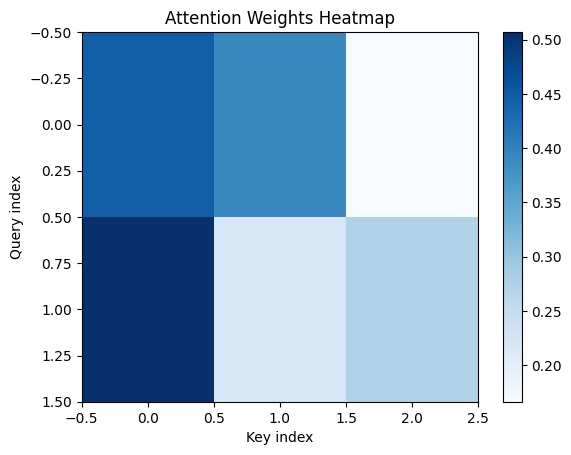

In [ ]:
# Setup
import numpy as np, matplotlib.pyplot as plt
np.random.seed(42)

def scaled_dot_product_attention(Q, K, V):
    d_k = K.shape[-1] # Dimension of each vector. In this case d_k = 4
    scores = Q @ K.T / np.sqrt(d_k)           # (query_len, key_len)
    weights = np.exp(scores) / np.exp(scores).sum(axis=-1, keepdims=True)
    output = weights @ V
    return output, weights

# Example: 2 queries, 3 tokens, 4D embeddings
Q = np.random.randn(2, 4)   # 2 queries
K = np.random.randn(3, 4)   # 3 keys
V = np.random.randn(3, 4)   # 3 values

out, w = scaled_dot_product_attention(Q, K, V)

print("Attention weights:\n", w)
print("\nOutput:\n", out)

# Visualize weights as heatmap
plt.imshow(w, cmap="Blues", aspect="auto")
plt.colorbar()
plt.xlabel("Key index")
plt.ylabel("Query index")
plt.title("Attention Weights Heatmap")
plt.show()


### 1. What is $d_k$?

* $d_k$ is the **dimension of each key vector**.
* In your example, `K` has shape `(3, 4)` → 3 keys, each with 4 numbers.
* So $d_k = 4$.
* That’s why in code we write:

  ```python
  d_k = K.shape[-1]  # the last dimension (4)
  ```
* We divide by $\sqrt{d_k}$ to prevent the dot products from getting too large when vectors are high-dimensional (otherwise softmax would saturate).

---

### 2. Why do we get 6 weights with 2 queries and 3 keys?

* Think of it this way: **each query attends to all keys**.
* If you have 1 query → you get 3 weights (one per key).
* If you have 2 queries → each query gets 3 weights.

  * Query 0 → weights over 3 keys
  * Query 1 → weights over 3 keys
* Together that’s a **matrix** of size `(2, 3)`.

That’s exactly what you see in your heatmap:

* y-axis = query index (2 queries)
* x-axis = key index (3 keys)
* The color = how much that query attends to that key.

---

### 3. What does the output shape mean?

* Your `V` matrix has shape `(3, 4)` → 3 values, each 4-dimensional.
* After weighting them for each query, the output has shape `(2, 4)`:

  * 2 queries × a new 4D vector each.
* So each query gets back a **contextualized embedding** (still 4D, same as V’s dimension).

---

✅ So the summary:

* $d_k$ = size of the key vectors (here, 4).
* Each query attends to **all keys** → that’s why you see a weight distribution per query.
* Output is one vector per query, built from a weighted average of the values.



1) Core (10–15 min)
Task: Change Q to be the same as one of the rows in K. What happens to the weights?

In [6]:
K = np.random.randn(3, 4)   # 3 keys
Q = K[[0]]  # query = first key
out, w = scaled_dot_product_attention(Q,K,V)
print("Weights:", w)

print("Dot products:", Q @ K.T)
print("Norms of keys:", np.linalg.norm(K, axis=1))


Weights: [[0.67521456 0.18878363 0.13600181]]
Dot products: [[3.28597393 0.73711596 0.08124928]]
Norms of keys: [1.81272555 2.38469359 0.82385553]


Note: Even though Q is identical to the first key, the first weight may not be the largest. This is because the dot product depends on both direction and magnitude. If another key vector has a larger norm (length), its dot product with Q can be bigger, so the softmax gives that key more weight. In practice, Transformers handle this by learning linear projections and often normalizing, but in this toy NumPy example raw magnitudes can dominate.

2) Practice (10–15 min)
Task: Try d_k=100 (make embeddings longer). Compare results with and without dividing by sqrt(d_k).

In [7]:
Q = np.random.randn(1,100)
K = np.random.randn(5,100)
V = np.random.randn(5,100)

# Without scaling
scores = Q @ K.T
weights_unscaled = np.exp(scores)/np.exp(scores).sum()
print("Unscaled:", weights_unscaled)

# With scaling
scores_scaled = scores/np.sqrt(100)
weights_scaled = np.exp(scores_scaled)/np.exp(scores_scaled).sum()
print("Scaled:", weights_scaled)


Unscaled: [[2.90943023e-02 2.40818157e-01 7.30082030e-01 1.57072190e-10
  5.51014294e-06]]
Scaled: [[0.2387224  0.29490443 0.32949554 0.03557315 0.10130448]]


3) Stretch (optional, 10–15 min)
Task: Implement attention with multiple queries at once (batched input).


In [8]:
Q = np.random.randn(4,100)  # 4 queries
K = np.random.randn(5,100)
V = np.random.randn(5,64)   # values can have different dim

out, w = scaled_dot_product_attention(Q,K,V)
print("Output shape:", out.shape)  # (4,64)


Output shape: (4, 64)


Mini-Challenge (≤40 min)

Build: A function visualize_attention(Q,K,V) that:

Computes attention.

Prints output shape.

Plots weights as a heatmap (queries × keys).

Acceptance Criteria:

Works with any Q,K,V sizes (as long as dimensions match).

Heatmap is clear.

Shows which keys each query attends to most.

Attention weights:
 [[0.25025151 0.14260976 0.43886659 0.07806393 0.09020821]
 [0.55443611 0.13506662 0.12771705 0.09661144 0.08616877]
 [0.17197893 0.31443394 0.36781143 0.02464715 0.12112855]
 [0.22680422 0.28150438 0.13724121 0.23514966 0.11930053]]

Output shape:
 (4, 64)


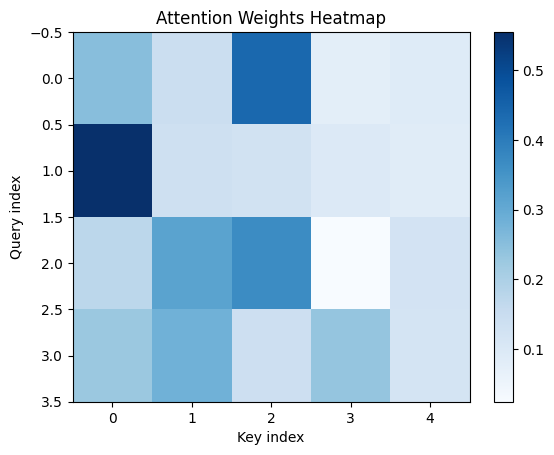

In [9]:

def visualize_attention(Q, K, V):
    d_k = K.shape[-1] # Dimension of each vector. In this case d_k = 4
    scores = Q @ K.T / np.sqrt(d_k)           # (query_len, key_len)
    weights = np.exp(scores) / np.exp(scores).sum(axis=-1, keepdims=True)
    output = weights @ V

    print("Attention weights:\n", weights)
    print("\nOutput shape:\n", output.shape)

    # Visualize weights as heatmap
    plt.imshow(weights, cmap="Blues", aspect="auto")
    plt.colorbar()
    plt.xlabel("Key index")
    plt.ylabel("Query index")
    plt.title("Attention Weights Heatmap")
    plt.show()

Q = np.random.randn(4,100)  # 4 queries
K = np.random.randn(5,100)
V = np.random.randn(5,64)   # values can have different dim

visualize_attention(Q, K, V)

Notes / Key Takeaways

Scaled dot-product attention = core Transformer building block.

Scaling prevents softmax from collapsing to near one-hot.

Works with multiple queries in parallel (matrix ops).

Output size = (queries × value_dim).

Visualizing weights helps build intuition.

Reflection

Why do we divide by sqrt(d_k) instead of leaving scores unscaled?

How does the weighted sum ensure information from multiple tokens can be blended?